**Imports**

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_curve, auc

**Preparing the Data**

In [20]:
grapes = np.load('Quidraw_data/G_36_grapes.npy')
ant = np.load('Quidraw_data/G_36_ant.npy')
test_images = np.load('Quidraw_data/test_images.npy')
test_labels = np.load('Quidraw_data/test_labels.npy')

We want to be sure that we have grapes in the grapes.npy and ant in ant.npy.

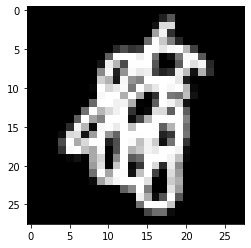

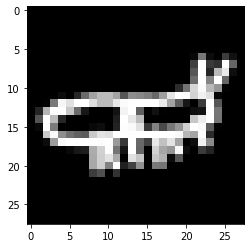

In [21]:
plt.imshow(grapes[0].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(ant[0].reshape(28,28), cmap='gray')
plt.show()

Now, we need to know what contains test_images.npy. With this visualization, we see that they are ants until the 500th.
Then, they are grapes until the last images. We show also the shapes of test images to know how much they are.

We see that they are 2000 train images and 1000 test images.
So we have a ratio of 1/3 test images on the dataset as a whole.
Which is a quite pretty usual ratio.
Looking for the shape of test_labels.npy we can know if they are errors or not in the dataset.
We can see that they are not.

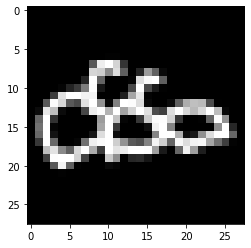

0


In [22]:
plt.imshow(test_images[100].reshape(28,28), cmap='gray')
plt.show()
print(test_labels[100])

In [23]:
train_images = np.concatenate((ant,grapes),axis=0)

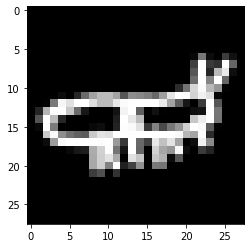

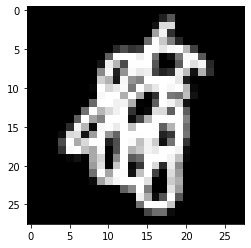

In [24]:
plt.imshow(train_images[0].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(train_images[1000].reshape(28,28), cmap='gray')
plt.show()

Here, we create a train_labels variable that contain the labels for the training images. 
We identified above that 0 are for ant and 1 for grapes.

In [25]:
train_labels = np.concatenate((np.zeros(1000),np.ones(1000)),axis=0)

Here, we prepare the data by scaling them using the MinMaxScaler() function because we want to have normalized data. Therefore, we could easily pass data into a neural network without having bit outlayers and not having too much difference between data.

We obtain a minimum of 0 and a maximum of 1.
We don't apply the scaler.fit() to the test images because we want the neural understand test as unseen data.

In [26]:
scaler=MinMaxScaler()
scaler.fit(train_images)
train_images = scaler.transform(train_images)
test_images = scaler.transform(test_images)

In [27]:
train_images.min()

0.0

In [28]:
train_images.max()

1.0

**Creating and Training the Baseline Model**

Here, we create a simple baseline model with only one neural like the perceptron model. 
We chose to focus our studies on neural networks because they can easier identify patterns in images than others model.
We will see in conclusion what could be the alternative.

About the activation function, we chose the sigmoid funciton because it is appropiate for binary classification. 
The purpose of this study is binary classification so we defined the loss as 'binary_crossentropy' also. 
We decide to choose the metrics "accuracy" and the optimizer "adam" but we will see below that we will use others
metrics more relevant to evaluate the model.

In [29]:
model =  Sequential()

model.add(Dense(1, input_dim=784, activation = "sigmoid"))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

At the beginning, we don't know the number of epochs needed so we volontary choose a high number of epochs.
We will see below how to optimize this parameter.

In [30]:
model.fit(x = train_images, 
                    y = train_labels, 
                    epochs=200, 
                    validation_data=(test_images,test_labels))

Epoch 1/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5543 - accuracy: 0.7235 - val_loss: 0.4869 - val_accuracy: 0.7800
Epoch 2/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.8125 - val_loss: 0.4681 - val_accuracy: 0.8020
Epoch 3/200
63/63 [==============================] - 0s 988us/step - loss: 0.4339 - accuracy: 0.8240 - val_loss: 0.4584 - val_accuracy: 0.8040
Epoch 4/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8290 - val_loss: 0.4532 - val_accuracy: 0.8100
Epoch 5/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8330 - val_loss: 0.4492 - val_accuracy: 0.8120
Epoch 6/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8390 - val_loss: 0.4467 - val_accuracy: 0.8120
Epoch 7/200
63/63 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8415 - val_loss: 0.4454 - val_accuracy: 0.8150
Epoch 8/200

63/63 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.8800 - val_loss: 0.4499 - val_accuracy: 0.8240
Epoch 59/200
63/63 [==============================] - ETA: 0s - loss: 0.1731 - accuracy: 0.96 - 0s 961us/step - loss: 0.3072 - accuracy: 0.8875 - val_loss: 0.4495 - val_accuracy: 0.8240
Epoch 60/200
63/63 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8845 - val_loss: 0.4510 - val_accuracy: 0.8210
Epoch 61/200
63/63 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8820 - val_loss: 0.4507 - val_accuracy: 0.8210
Epoch 62/200
63/63 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.8850 - val_loss: 0.4504 - val_accuracy: 0.8220
Epoch 63/200
63/63 [==============================] - 0s 915us/step - loss: 0.3032 - accuracy: 0.8840 - val_loss: 0.4509 - val_accuracy: 0.8240
Epoch 64/200
63/63 [==============================] - 0s 903us/step - loss: 0.3027 - accuracy: 0.8850 - val_loss: 0

Epoch 115/200
63/63 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.9025 - val_loss: 0.4649 - val_accuracy: 0.8140
Epoch 116/200
63/63 [==============================] - 0s 1ms/step - loss: 0.2710 - accuracy: 0.9010 - val_loss: 0.4645 - val_accuracy: 0.8130
Epoch 117/200
63/63 [==============================] - 0s 966us/step - loss: 0.2705 - accuracy: 0.9015 - val_loss: 0.4659 - val_accuracy: 0.8140
Epoch 118/200
63/63 [==============================] - 0s 948us/step - loss: 0.2715 - accuracy: 0.9025 - val_loss: 0.4654 - val_accuracy: 0.8110
Epoch 119/200
63/63 [==============================] - 0s 1ms/step - loss: 0.2690 - accuracy: 0.9010 - val_loss: 0.4662 - val_accuracy: 0.8110
Epoch 120/200
63/63 [==============================] - 0s 994us/step - loss: 0.2697 - accuracy: 0.9035 - val_loss: 0.4667 - val_accuracy: 0.8120
Epoch 121/200
63/63 [==============================] - 0s 1ms/step - loss: 0.2689 - accuracy: 0.9045 - val_loss: 0.4685 - val_accuracy: 

Epoch 172/200
63/63 [==============================] - 0s 960us/step - loss: 0.2493 - accuracy: 0.9100 - val_loss: 0.4830 - val_accuracy: 0.8140
Epoch 173/200
63/63 [==============================] - 0s 908us/step - loss: 0.2493 - accuracy: 0.9090 - val_loss: 0.4826 - val_accuracy: 0.8130
Epoch 174/200
63/63 [==============================] - 0s 898us/step - loss: 0.2501 - accuracy: 0.9120 - val_loss: 0.4824 - val_accuracy: 0.8090
Epoch 175/200
63/63 [==============================] - 0s 949us/step - loss: 0.2486 - accuracy: 0.9105 - val_loss: 0.4828 - val_accuracy: 0.8090
Epoch 176/200
63/63 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.9115 - val_loss: 0.4836 - val_accuracy: 0.8130
Epoch 177/200
63/63 [==============================] - 0s 1ms/step - loss: 0.2481 - accuracy: 0.9130 - val_loss: 0.4848 - val_accuracy: 0.8140
Epoch 178/200
63/63 [==============================] - 0s 979us/step - loss: 0.2483 - accuracy: 0.9100 - val_loss: 0.4846 - val_accura

As we only use one perceptron for the baseline. The training should be pretty fast whatever the computer you have.

Here, we define a variable loss_df (for dataframe) that contain the results of the different epochs.

In [32]:
loss_df = pd.DataFrame(model.history.history)

We plot this results here.

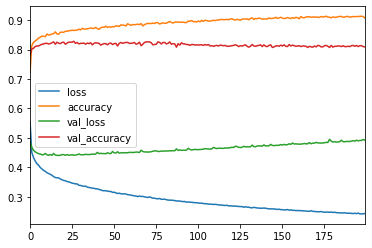

In [33]:
loss_df.plot()

We see that over 20 epochs, the loss is not improving a lot so we keep epochs = 20.
We could also see that the validation loss (val_loss) is increasing while the loss (for training sample) is decreasing with the number of epochs. This is a pathology called overfitting that we will try to deal with below.
Before, we want to confirm this result so let print the evaluation for test and train images

In [35]:
print(model.evaluate(test_images, test_labels, verbose=0)[1])
print(model.evaluate(train_images, train_labels, verbose=0)[1])

0.8090000152587891
0.9144999980926514


We see just above that the train accuaracy is much more better than the test images. Our hypothesis about overfitting is not rejected.

In [36]:
test_predictions = model.predict(test_images)
test_predictions = pd.Series(test_predictions.reshape(1000,))
test_predictions = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)
eval_df = pd.concat([pd.Series(test_labels), test_predictions], axis=1)
eval_df.columns = ['Test True Y', 'Model Predictions']

We store the predictions for test into a variable test_predictions that will be transform to have a binary results.
Then we evaluate the Root Mean Squared Error.

**Model Evaluation with RMSE**

In [37]:
mean_squared_error(eval_df['Test True Y'], eval_df['Model Predictions'])**0.5

0.43703546766824314

Let's see if we can improve this RMSE.

**Creating and Training a Better Model**

**Dealing with Overfitting and Evaluation**

What we do here, is that we define a variable early_stop that will trigger the stop of the training if the loss on the test dataset is not decreasing anymore.

In [38]:
early_stop = EarlyStopping(monitor = 'val_loss', 
                           mode = 'min', 
                           verbose = 1, 
                           patience = 25)

To compare with the first model with this technique, we us the same.

In [39]:
model2 = Sequential()

model2.add(Dense(1, input_dim=784, activation = 'sigmoid'))

model2.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics = ['accuracy'])

In [40]:
model2.fit(x = train_images, 
           y = train_labels, 
           epochs = 200, 
           validation_data=(test_images, test_labels),
           callbacks = [early_stop])

Epoch 1/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7165 - val_loss: 0.4877 - val_accuracy: 0.7850
Epoch 2/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.8165 - val_loss: 0.4677 - val_accuracy: 0.7980
Epoch 3/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8220 - val_loss: 0.4595 - val_accuracy: 0.7970
Epoch 4/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8305 - val_loss: 0.4561 - val_accuracy: 0.8020
Epoch 5/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8290 - val_loss: 0.4524 - val_accuracy: 0.8100
Epoch 6/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8360 - val_loss: 0.4497 - val_accuracy: 0.8160
Epoch 7/200
63/63 [==============================] - 0s 969us/step - loss: 0.4001 - accuracy: 0.8435 - val_loss: 0.4480 - val_accuracy: 0.8150
Epoch 8/200

We see that early stop was triggered at the epoch 40 over 200. Let's see the results.

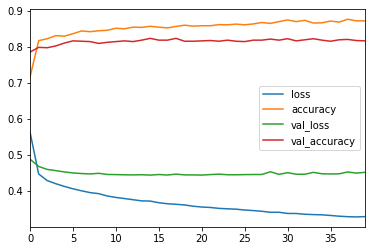

In [42]:
loss_df2 = pd.DataFrame(model2.history.history)
loss_df2.plot()

This is much better than above because we can't see that the validation loss is not increasing. Moreover, the difference between the test loss and the train loss is not a very high comparing to the first training.

In [44]:
print(model2.evaluate(test_images, test_labels, verbose=0)[1])
print(model2.evaluate(train_images, train_labels, verbose=0)[1])

0.8159999847412109
0.8679999709129333


The print of the evaluation confirm our hypothesis.

In [46]:
test_predictions = model2.predict(test_images)
test_predictions = pd.Series(test_predictions.reshape(1000,))
test_predictions = test_predictions.apply(lambda x: 1 if x >= 0.5 else 0)
eval_df = pd.concat([pd.Series(test_labels), test_predictions], axis=1)
eval_df.columns = ['Test True Y', 'Model Predictions']

**Model Evaluation with RMSE**

In [47]:
mean_squared_error(eval_df['Test True Y'], eval_df['Model Predictions'])**0.5

0.4289522117905443

Now that we know our accuray, it will be interesting to have the ROC so we can conclude if our model is relevant or not.

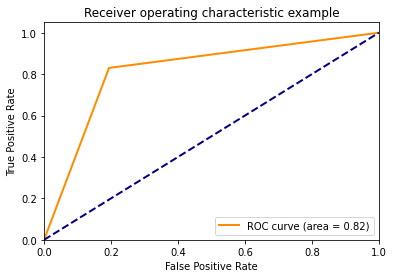

In [151]:
fpr, tpr, _ = roc_curve(test_labels, test_predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

With the ROC, we can see that our model is better than a random classifier and that is not overfitting because the curve is between the perfect classifier and the random classifier. With an area of 0.82 we can say that our model is a pretty good binary classifier for ant and grapes. The report below confirm this.

In [152]:
print(classification_report(test_labels, test_predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       500
           1       0.81      0.83      0.82       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



In [117]:
print(confusion_matrix(test_labels, test_predictions))

[[416  84]
 [100 400]]
